# Loan Default Risk Analysis: Lending Club Case Study
Analysing Data to Determine the Elements Affecting Loan Defaults

### Overview
Using historical data from Lending Club, this analysis aims to identify the trends and important variables linked to loan defaults. We hope to offer practical insights that might reduce financial risks and improve loan decisions by carrying out an extensive Exploratory Data Analysis (EDA).

### Goal
to identify important factors affecting loan repayment patterns, which will help identify high-risk applicants and minimise credit losses.

### Overview of the Dataset
Key characteristics including loan amount, period, interest rate, length of employment, credit rating, and repayment outcome (e.g., fully paid or charged-off) are captured in the dataset, which is made up of historical loan data from 2007 to 2011.

# Section 1: Importing Necessary Libraries
### Importing required libraries for data manipulation, visualization, and analysis


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

print('Packages imported successfully')

Packages imported successfully



# Section 2: Loading the Dataset
### Load the loan dataset and display its structure to understand its contents

In [6]:
df=pd.read_csv("data/loan.csv")
print('Data loaded successfully')
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')


Data loaded successfully
The dataset contains 39717 rows and 111 columns.


# Section 3: Initial Data Exploration
### Checking the first few rows, data types, and basic statistics of the dataset


In [7]:
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [8]:
print(df.tail())

          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN       

In [9]:
print(df.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

# Section 4: Data Cleaning
This section focuses on preparing the dataset for analysis by:
- Removing irrelevant and duplicate columns.
- Handling missing and inconsistent values.
- Converting categorical data into numerical or structured formats.



In [10]:
# Count the total number of missing values in each column
# This helps identify which columns have missing data and sorts them in descending order
df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [11]:
print(f"Number of columns before cleaning: {df.shape[1]}")

#Calculate the percentage of missing values for each column
# Divide the number of missing values in a column by the total number of rows in the DataFrame
missing_perc = df.isna().sum() / len(df) * 100

# Filter the column names where missing values > 40%
columns_with_high_missing = missing_perc[missing_perc > 40].index.tolist()

# Display the result
print("Columns with more than 40% missing values:")
print(f"Number of columns to drop: {len(columns_with_high_missing)}")


Number of columns before cleaning: 111
Columns with more than 40% missing values:
Number of columns to drop: 57


In [12]:
# Dropping all the columns as these columns will not help in any analysis for the case study
df.drop(columns=columns_with_high_missing, axis=1, inplace=True)
print(f"Number of columns after cleaning: {df.shape[1]}")

Number of columns after cleaning: 54


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
### These columns are either not required for analysis or duplicate because similar value can be derived from a different column

extra_columns_to_be_deleted = ['member_id','url', 'collection_recovery_fee','desc', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'title', 'emp_title', 'zip_code', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',  'revol_bal', 'revol_util', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',  'last_credit_pull_d', 'collections_12_mths_ex_med','tax_liens', 'chargeoff_within_12_mths', 'sub_grade', 'pymnt_plan','issue_d', 'policy_code','total_acc']

df.drop(columns=extra_columns_to_be_deleted, axis=1, inplace=True)


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  object 
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

### Checking 'na' values again to see if any data can be corrected

In [16]:
df.isna().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
pub_rec                    0
application_type           0
acc_now_delinq             0
delinq_amnt                0
pub_rec_bankruptcies     697
dtype: int64

### Starting with emp_length column first as it is of type Object

In [17]:
df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [18]:
test_length = len(df['emp_length'])
test_length

39717

In [19]:
### First deleting the rows with NA values
df1 = df.dropna(subset='emp_length')

In [20]:
df1.isna().sum()


id                        0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
pub_rec                   0
application_type          0
acc_now_delinq            0
delinq_amnt               0
pub_rec_bankruptcies    697
dtype: int64

In [21]:
### method to clean up the employee length values
### Convert the values into meaningful data by removing extra string values and symbols
def refactor_emp_length(emp_length):

    if emp_length == '< 1 year':
        return 0
    elif emp_length == '10+ years':
        return 10
    else:
        return int(emp_length.split()[0])

## Saving the data into a new Data Frame
df1['emp_length'] = df1['emp_length'].apply(refactor_emp_length)

In [22]:
df1['emp_length']

0        10
1         0
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38642, dtype: int64

In [23]:
df1.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'pub_rec', 'application_type', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [24]:
df1.isna().sum()

id                        0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
pub_rec                   0
application_type          0
acc_now_delinq            0
delinq_amnt               0
pub_rec_bankruptcies    697
dtype: int64

### Checking if there any unique values in pub_rec_bankruptcies

In [25]:
print(df1['pub_rec_bankruptcies'].unique())


[ 0.  1.  2. nan]


In [26]:
### Replacing the missing values with 0 which means that there is no bankruptcy
df1['pub_rec_bankruptcies'].fillna(0, inplace=True)


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   funded_amnt_inv       38642 non-null  float64
 4   term                  38642 non-null  object 
 5   int_rate              38642 non-null  object 
 6   installment           38642 non-null  float64
 7   grade                 38642 non-null  object 
 8   emp_length            38642 non-null  int64  
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  loan_status           38642 non-null  object 
 13  purpose               38642 non-null  object 
 14  addr_state            38642 non-null  object 
 15  dti                   38

### Converting the values of term column


In [28]:
df1['term']

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 38642, dtype: object

In [29]:
### term column is of type Object. We are extracting only the int value
df1['term'] = df1['term'].str.extract('(\d+)').astype(int)

In [30]:
df1['term']

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 38642, dtype: int64

### Converting the int_rate column to float


In [31]:
df1['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38642, dtype: object

In [32]:
df1['int_rate'] = df1['int_rate'].str.rstrip('%').astype(float)

In [33]:
df1['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38642, dtype: float64

### Checking home_ownership values and removing any unwanted rows

In [34]:
df1['home_ownership'].value_counts()

home_ownership
RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
NONE            3
Name: count, dtype: int64

In [35]:
### Removing the rows with value as NONE
df1 = df1.loc[df1['home_ownership']!='NONE']


In [36]:
df1['home_ownership'].value_counts()

home_ownership
RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
Name: count, dtype: int64

In [37]:
df1['home_ownership'] = df1['home_ownership'].astype(str)
print(df1['home_ownership'].dtype)

object


### Working on loan_status column and removing the rows with the status as "Current"


In [38]:
df1['loan_status'].value_counts()

loan_status
Fully Paid     32142
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [39]:
### Assigning to a new data frame and Check unique values in loan_status
print("Unique loan_status values:", df1['loan_status'].unique())

# Filter out 'Current' if applicable
df_latest = df1.loc[df1['loan_status'] != 'Current']

status_mapping = {'Fully Paid': 1, 'Charged Off': 0}
df_latest['loan_status'] = df_latest['loan_status'].map(status_mapping)

# Check for null values after mapping
print("Rows after filtering:", df_latest.shape)
print("Null values in loan_status after mapping:", df_latest['loan_status'].isna().sum())


Unique loan_status values: ['Fully Paid' 'Charged Off' 'Current']
Rows after filtering: (37541, 22)
Null values in loan_status after mapping: 0


In [40]:
df_latest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37541 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37541 non-null  int64  
 1   loan_amnt             37541 non-null  int64  
 2   funded_amnt           37541 non-null  int64  
 3   funded_amnt_inv       37541 non-null  float64
 4   term                  37541 non-null  int64  
 5   int_rate              37541 non-null  float64
 6   installment           37541 non-null  float64
 7   grade                 37541 non-null  object 
 8   emp_length            37541 non-null  int64  
 9   home_ownership        37541 non-null  object 
 10  annual_inc            37541 non-null  float64
 11  verification_status   37541 non-null  object 
 12  loan_status           37541 non-null  int64  
 13  purpose               37541 non-null  object 
 14  addr_state            37541 non-null  object 
 15  dti                   37

### Finding Outliers in the data

In [41]:
# Identifying outliers in numerical columns using IQR
numerical_cols = ['loan_amnt', 'annual_inc', 'installment']
outlier_summary = {}

for col in numerical_cols:
    Q1 = df_latest[col].quantile(0.25)
    Q3 = df_latest[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_latest[(df1[col] < lower_bound) | (df_latest[col] > upper_bound)]
    outlier_summary[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers)
    }
print("Outlier Summary:")
print(outlier_summary)


Outlier Summary:
{'loan_amnt': {'Lower Bound': np.float64(-8750.0), 'Upper Bound': np.float64(29250.0), 'Outliers Count': 1078}, 'annual_inc': {'Lower Bound': np.float64(-22000.0), 'Upper Bound': np.float64(146000.0), 'Outliers Count': 1730}, 'installment': {'Lower Bound': np.float64(-225.11), 'Upper Bound': np.float64(821.53), 'Outliers Count': 1244}}


### Dealing with the Outliers

In [42]:
# Capping outliers at the upper bound
for col in numerical_cols:
    upper_bound = outlier_summary[col]["Upper Bound"]
    df_latest[col] = np.where(df_latest[col] > upper_bound, upper_bound, df_latest[col])


### Calculating Loan-to-Income Ratio

In [43]:
# Calculating Loan-to-Income Ratio
df_latest['LTI'] = df_latest['loan_amnt'] / df_latest['annual_inc']


### Expanding the grouping concept for other critical variables

In [44]:
# Grouping data for deeper insights
grouped_data = df_latest.groupby(['term', 'grade', 'verification_status']).agg({
    'loan_amnt': ['mean', 'max'],
    'int_rate': ['mean', 'max'],
    'LTI': ['mean', 'max']
}).reset_index()
print("Grouped Data Summary:")
print(grouped_data)


Grouped Data Summary:
   term grade verification_status     loan_amnt            int_rate         \
                                           mean      max       mean    max   
0    36     A        Not Verified   7171.452386  29250.0   7.407254   9.63   
1    36     A     Source Verified   8578.110551  29250.0   7.187722   9.63   
2    36     A            Verified  11842.110900  29250.0   7.385688   9.63   
3    36     B        Not Verified   8740.346154  25000.0  10.993589  12.69   
4    36     B     Source Verified   8822.906121  29250.0  10.953212  12.69   
5    36     B            Verified  13690.470140  29250.0  11.068640  12.69   
6    36     C        Not Verified   8165.593368  29250.0  13.283222  16.11   
7    36     C     Source Verified   8256.688018  29250.0  13.704755  15.96   
8    36     C            Verified  12360.250174  29250.0  13.596525  16.11   
9    36     D        Not Verified   8971.029610  25000.0  15.066729  18.49   
10   36     D     Source Verified   9283.7

### Adding a new column installment_to_income_ratio

In [45]:
df_latest['installment_to_income_ratio'] = df_latest['installment'] / df_latest['annual_inc']

In [46]:
df_latest['installment_to_income_ratio'].describe()

count    37541.000000
mean         0.005455
std          0.003254
min          0.000181
25%          0.002979
50%          0.004849
75%          0.007282
max          0.026689
Name: installment_to_income_ratio, dtype: float64

### Creating different Subsets of data for in-depth analysis

In [47]:
# Creating subsets for different loan statuses to explore patterns
df_charged_off = df_latest[df_latest['loan_status'] == 0]
df_fully_paid = df_latest[df_latest['loan_status'] == 1]

# Validate the subsets
print(f"Charged Off Loans: {df_charged_off.shape[0]} rows")
print(f"Fully Paid Loans: {df_fully_paid.shape[0]} rows")


Charged Off Loans: 5399 rows
Fully Paid Loans: 32142 rows


### Summary of Data Cleaning

#### Missing Values Handling:

- Identified and dropped 57 columns with more than 40% missing values to focus on reliable and meaningful data.
- Replaced missing values in pub_rec_bankruptcies with 0, interpreting the absence of values as no bankruptcies.

#### Categorical Data Transformation:

- Converted the term column from object format (e.g., "36 months") to integer values for consistency.
- Cleaned and standardized the emp_length column by removing extraneous text (e.g., "10+ years") and converting it into numerical values.
- Reformatted the int_rate column by removing percentage signs and converting it into a float.

#### Outlier Detection and Treatment:

- Identified outliers in loan_amnt and annual_inc using the Interquartile Range (IQR) method.
Capped extreme values in annual_inc at the upper bound (e.g., 145,000 for the overall dataset and 132,000 for charged-off loans) to reduce the impact of outliers.

#### Irrelevant Values Removal:

- Removed rows with invalid or unnecessary values in the home_ownership column (e.g., entries labeled as "NONE").
- Excluded rows with loan_status labeled as "Current," as these loans are still active and do not provide insights into defaults or repayments.

#### New Feature Engineering:

- Created a new column, Loan-to-Income Ratio (LTI), by dividing loan_amnt by annual_inc to provide insights into the borrower's financial risk.
- Created another column, installment_to_income_ratio
- Generated subsets of data for specific analyses (e.g., a dataset for loans that are "Charged Off").

#### Grouping and Aggregation:

- Grouped data by features such as LTI, term, installment, and verification_status to gain deeper insights into loan trends and borrower profiles.

#### Feature Selection:

- Removed redundant or non-informative columns (e.g., member_id, desc, zip_code) that do not contribute to meaningful analysis.

#### Final Dataset:

- The cleaned dataset now contains 37541 rows and 21 columns, making it ready for exploratory data analysis, visualization, and modeling.

### Section 5: Analysis

1. Numerical Variables

The following columns are numerical in the dataset:

- loan_amnt (Loan Amount)
- funded_amnt (Funded Amount)
- funded_amnt_inv (Funded Amount by Investors)
- int_rate (Interest Rate)
- installment (Monthly Installment)
- annual_inc (Annual Income)
- dti (Debt-to-Income Ratio)
- emp_length (Employment Length in Years)
- pub_rec_bankruptcies (Public Records of Bankruptcies)
- LTI (Loan-to-Income Ratio)
- installment_to_income_ratio (Ratio of Monthly Installment to Income)
2. Categorical Variables

The following columns are categorical in the dataset:

- term (Loan Term: 36 or 60 months)
- grade (Loan Grade)
- home_ownership (Home Ownership Status)
- verification_status (Verification Status)
- loan_status (Loan Status: Fully Paid or Charged Off)
- purpose (Purpose of Loan)
- addr_state (State of Borrower)

### Univariant Analysis

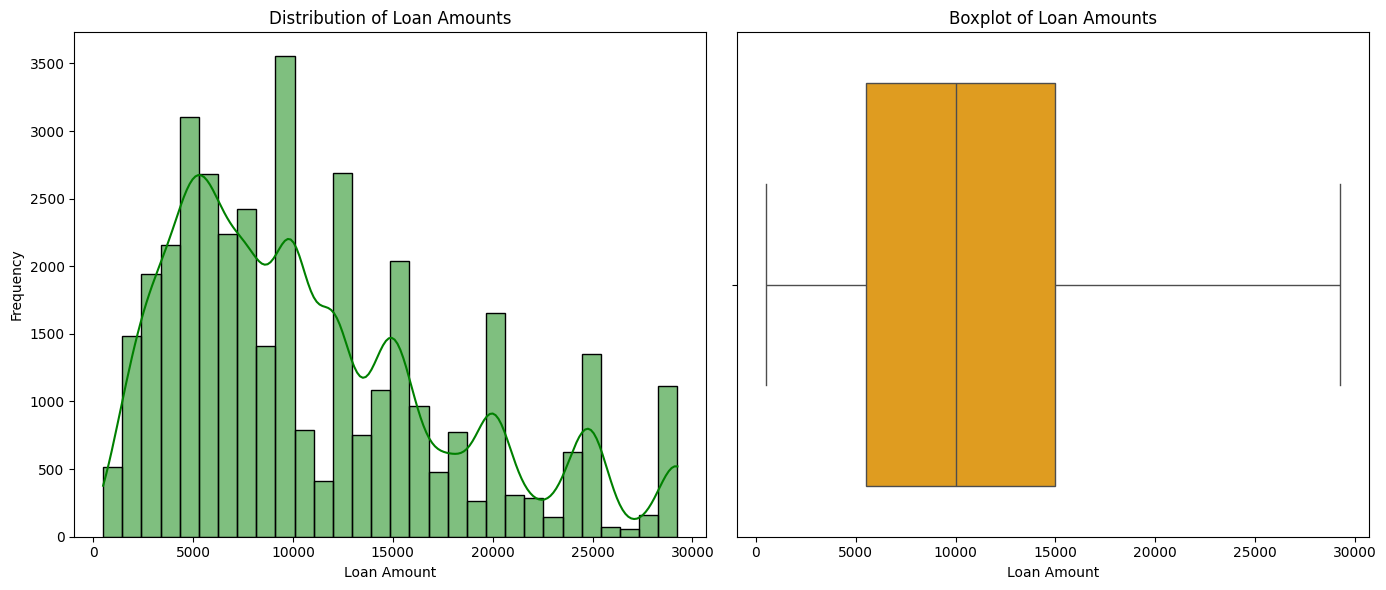

In [48]:
# Plot for `loan_amnt`
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_latest['loan_amnt'], kde=True, color='green', bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_latest, x='loan_amnt', color='orange')
plt.title('Boxplot of Loan Amounts')
plt.xlabel('Loan Amount')

plt.tight_layout()
plt.show()


Analysis for (loan_amnt)
- It can observed that loan amounts are concentrated between 5,000 and 15,000, with fewer loans exceeding 20,000. The highest frequency is around 10,000
- This distribution aligns with the expectations for typical loan amounts offered by lending institutions, focusing on small-to-medium loans.
- The apparent clustering around certain amounts like 10,000, 20,000, and 25,000 may reflect common borrowing patterns or lending policies.

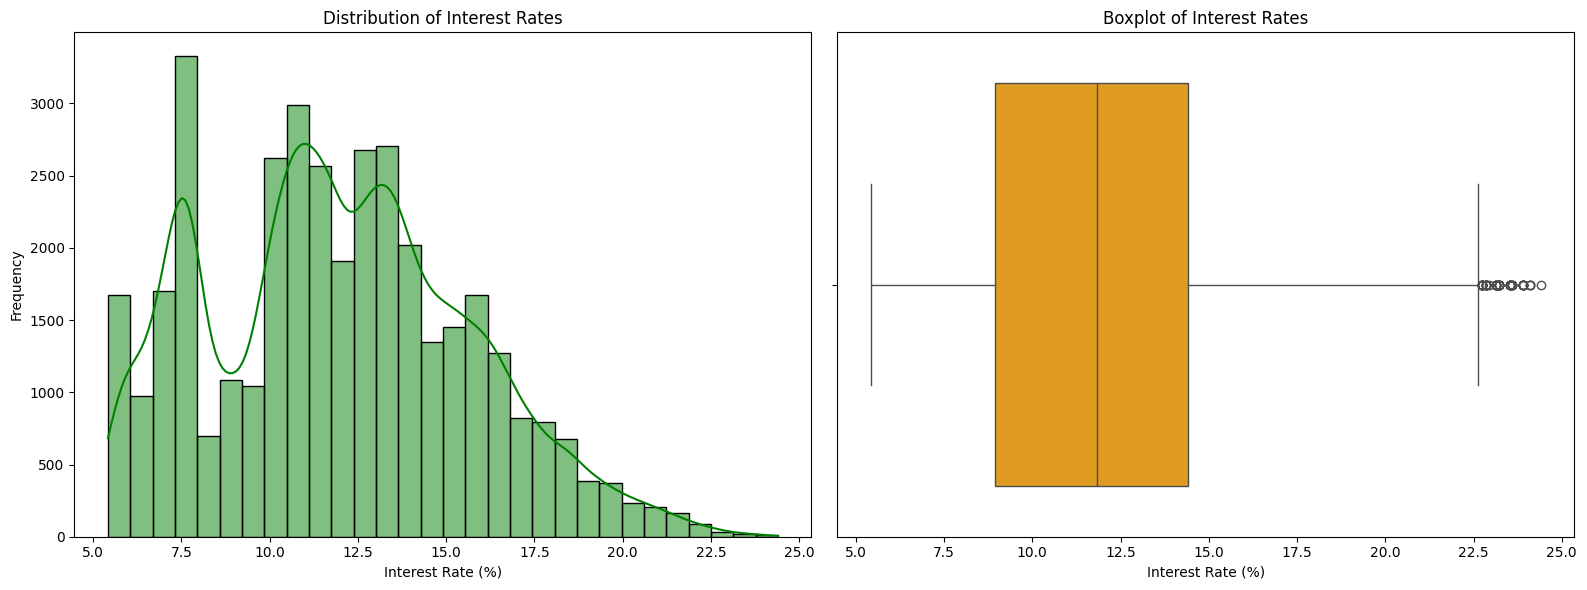

In [49]:
# Setting the plot style
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the histogram
sns.histplot(df_latest['int_rate'], kde=True, bins=30, color='green', ax=axes[0])
axes[0].set_title('Distribution of Interest Rates')
axes[0].set_xlabel('Interest Rate (%)')
axes[0].set_ylabel('Frequency')

# Plotting the boxplot
sns.boxplot(data=df_latest, x='int_rate', color='orange', ax=axes[1])
axes[1].set_title('Boxplot of Interest Rates')
axes[1].set_xlabel('Interest Rate (%)')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

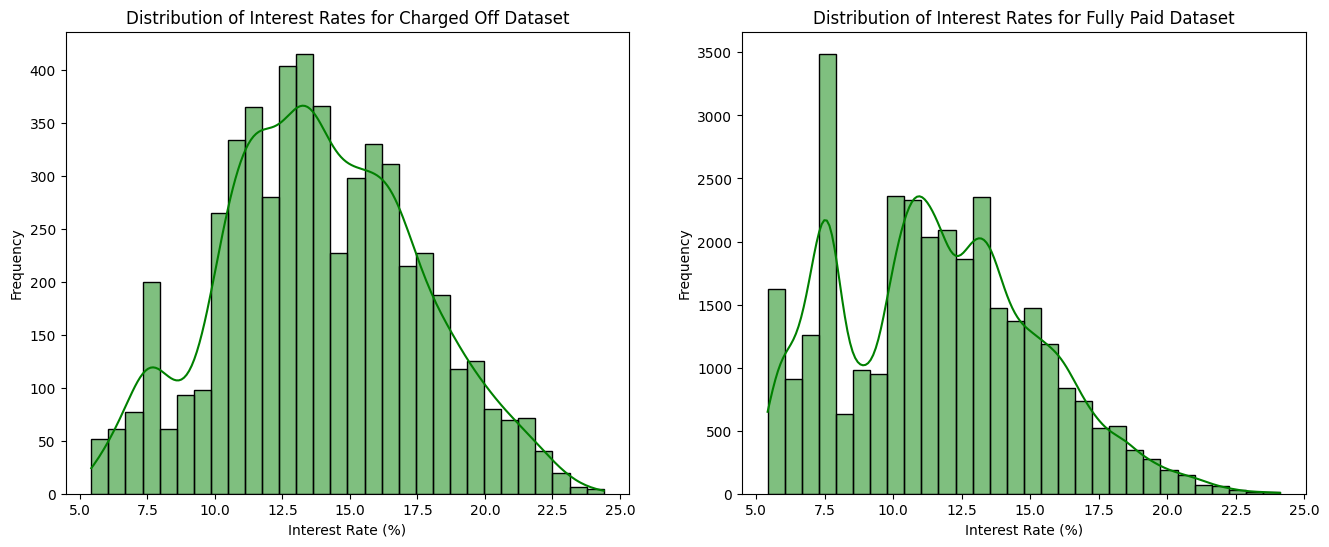

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the histogram
sns.histplot(df_charged_off['int_rate'], kde=True, bins=30, color='green', ax=axes[0])
axes[0].set_title('Distribution of Interest Rates for Charged Off Dataset')
axes[0].set_xlabel('Interest Rate (%)')
axes[0].set_ylabel('Frequency')

# Plotting the histogram
sns.histplot(df_fully_paid['int_rate'], kde=True, bins=30, color='green', ax=axes[1])
axes[1].set_title('Distribution of Interest Rates for Fully Paid Dataset')
axes[1].set_xlabel('Interest Rate (%)')
axes[1].set_ylabel('Frequency')

Analysis of Interest Rate (int_rate)
- The distribution of interest rates is concentrated between 10% and 15%.
- There is a peak near 7.5%, indicating a common rate offered.
- The tail tapers off after 20%, with a small number of loans having higher interest rates.
- The majority of loans fall within the range of 10% to 15%, as indicated by the interquartile range (IQR).
- Outliers are present beyond 22% which represents loans with significantly higher interest rates.
- For interest rates for charged off are mostly between 10%-17% when compared to fully paid it is between 10% - 15%

Text(0, 0.5, 'Frequency')

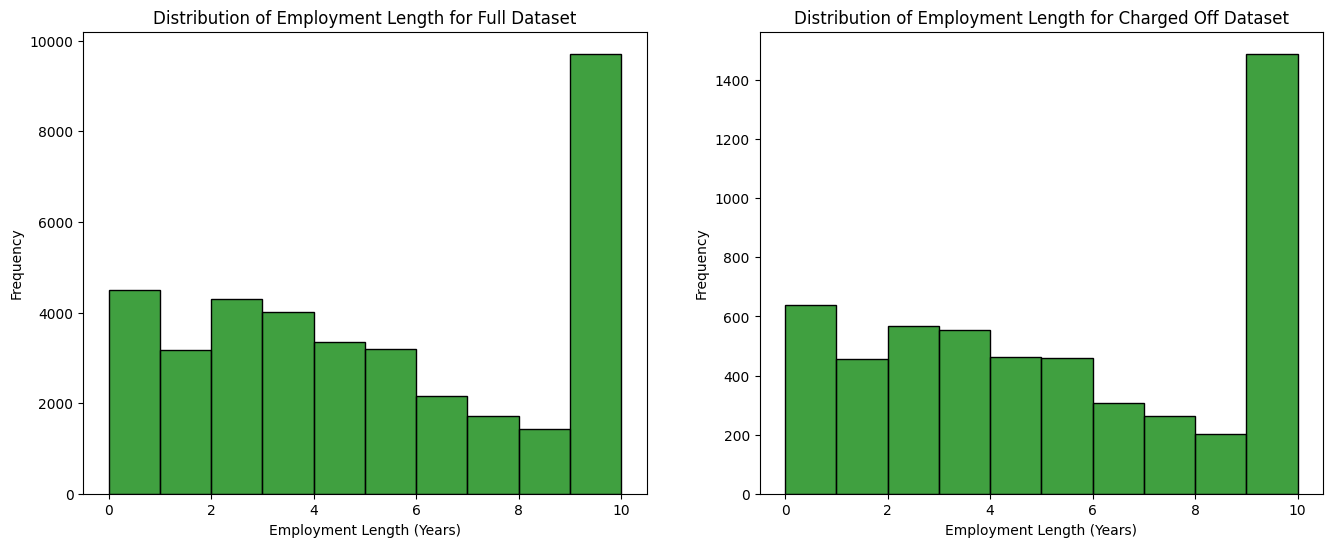

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(df_latest['emp_length'], kde=False, bins=10, color='green', ax=axes[0])
axes[0].set_title('Distribution of Employment Length for Full Dataset')
axes[0].set_xlabel('Employment Length (Years)')
axes[0].set_ylabel('Frequency')

sns.histplot(df_charged_off['emp_length'], kde=False, bins=10, color='green', ax=axes[1])
axes[1].set_title('Distribution of Employment Length for Charged Off Dataset')
axes[1].set_xlabel('Employment Length (Years)')
axes[1].set_ylabel('Frequency')


Analysis of Employment Length (emp_length)
- The large number of borrowers with 10+ years of employment suggests that borrowers with stable, long-term employment are prominent in the dataset. This aligns with lending institutions' preference for borrowers with higher job stability, as it reduces the risk of default.
- Even for the Charged off data set, it is clear that most of the defaulters are with 10+ years of employment and less than 1 year of tenure.

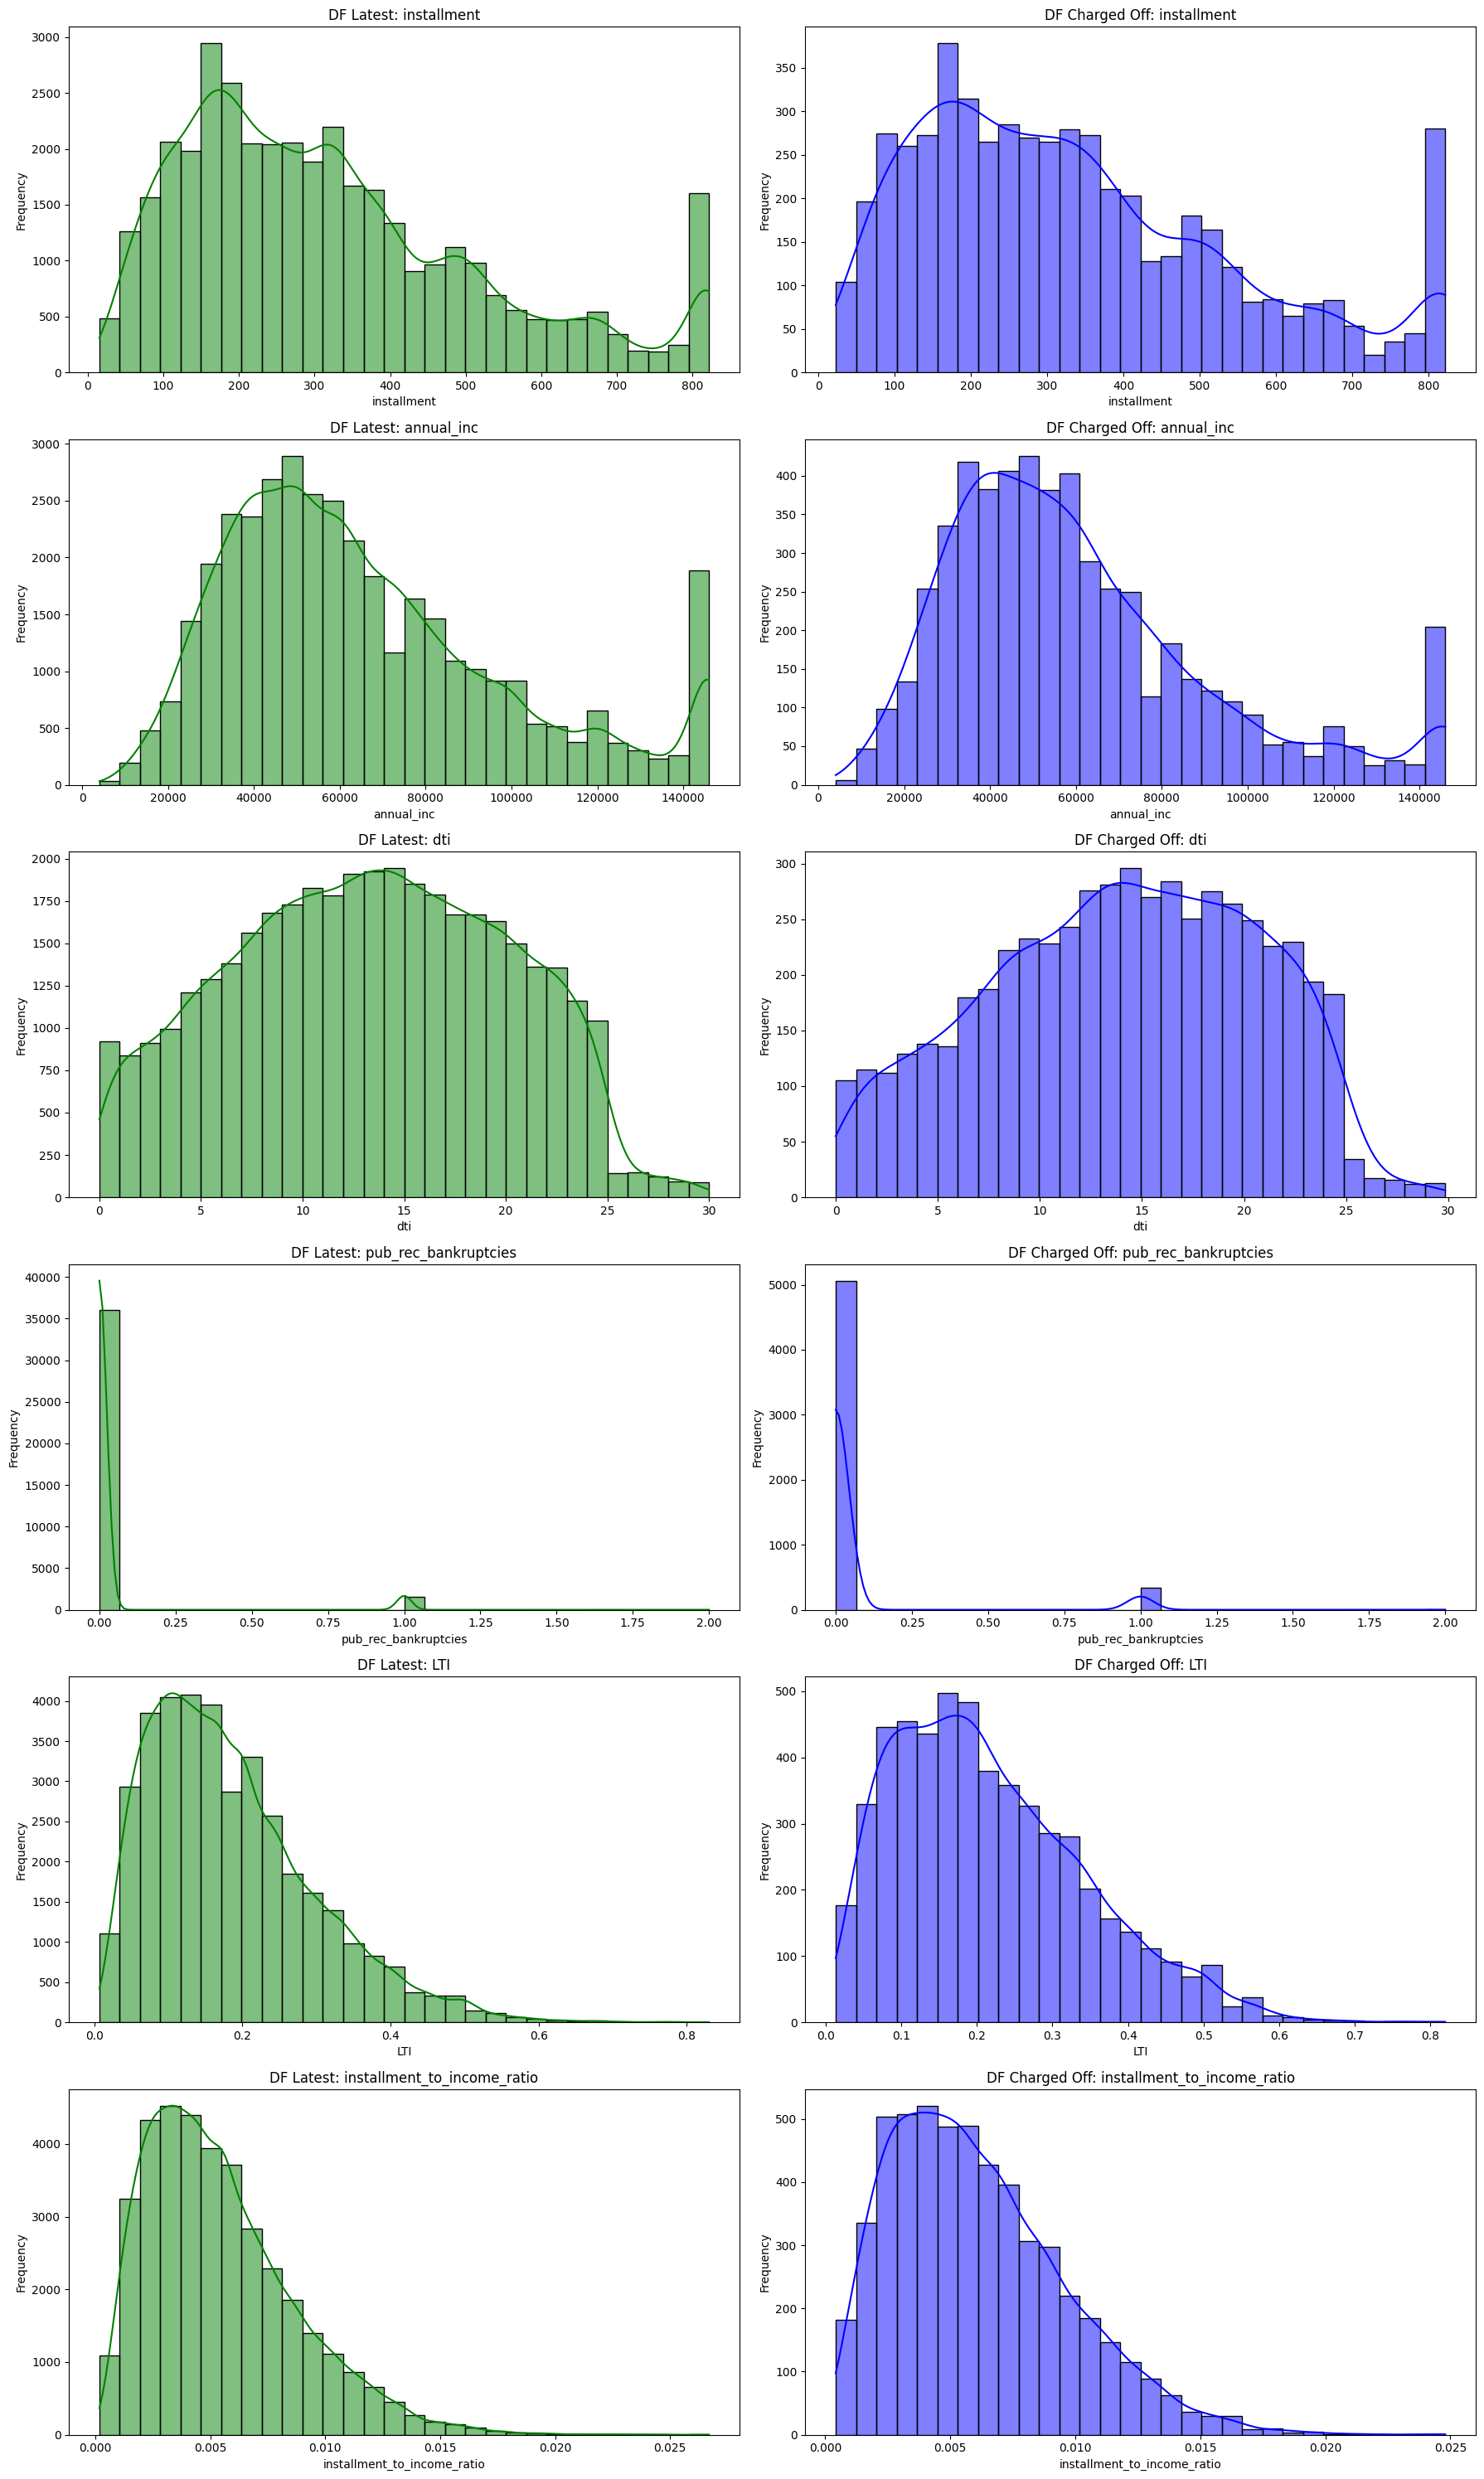

In [52]:
# List of numerical columns
numerical_cols = [
    'installment','annual_inc', 'dti', 'pub_rec_bankruptcies', 'LTI',
    'installment_to_income_ratio'
]

# Creating grouped histograms
def plot_histograms(df1, df2, columns, title1, title2):
    fig, axes = plt.subplots(len(columns), 2, figsize=(18, 5 * len(columns)))
    for i, col in enumerate(columns):
        if col in df1.columns and not df1[col].isnull().all():
            sns.histplot(df1[col], kde=True, color='green', bins=30, ax=axes[i, 0])
            axes[i, 0].set_title(f'{title1}: {col}')
            axes[i, 0].set_xlabel(col)
            axes[i, 0].set_ylabel('Frequency')
        else:
            axes[i, 0].set_visible(False)

        if col in df2.columns and not df2[col].isnull().all():
            sns.histplot(df2[col], kde=True, color='blue', bins=30, ax=axes[i, 1])
            axes[i, 1].set_title(f'{title2}: {col}')
            axes[i, 1].set_xlabel(col)
            axes[i, 1].set_ylabel('Frequency')
        else:
            axes[i, 1].set_visible(False)
    plt.tight_layout()
    plt.show()

plot_histograms(df_latest, df_charged_off, numerical_cols, "DF Latest", "DF Charged Off")



Analysis of Numerical Columns with two different datasets (df_latest) and (df_charged_off)
- Overall both the datasets have similar pattern
- Most of the people who defaulted have not filed for bankrupt

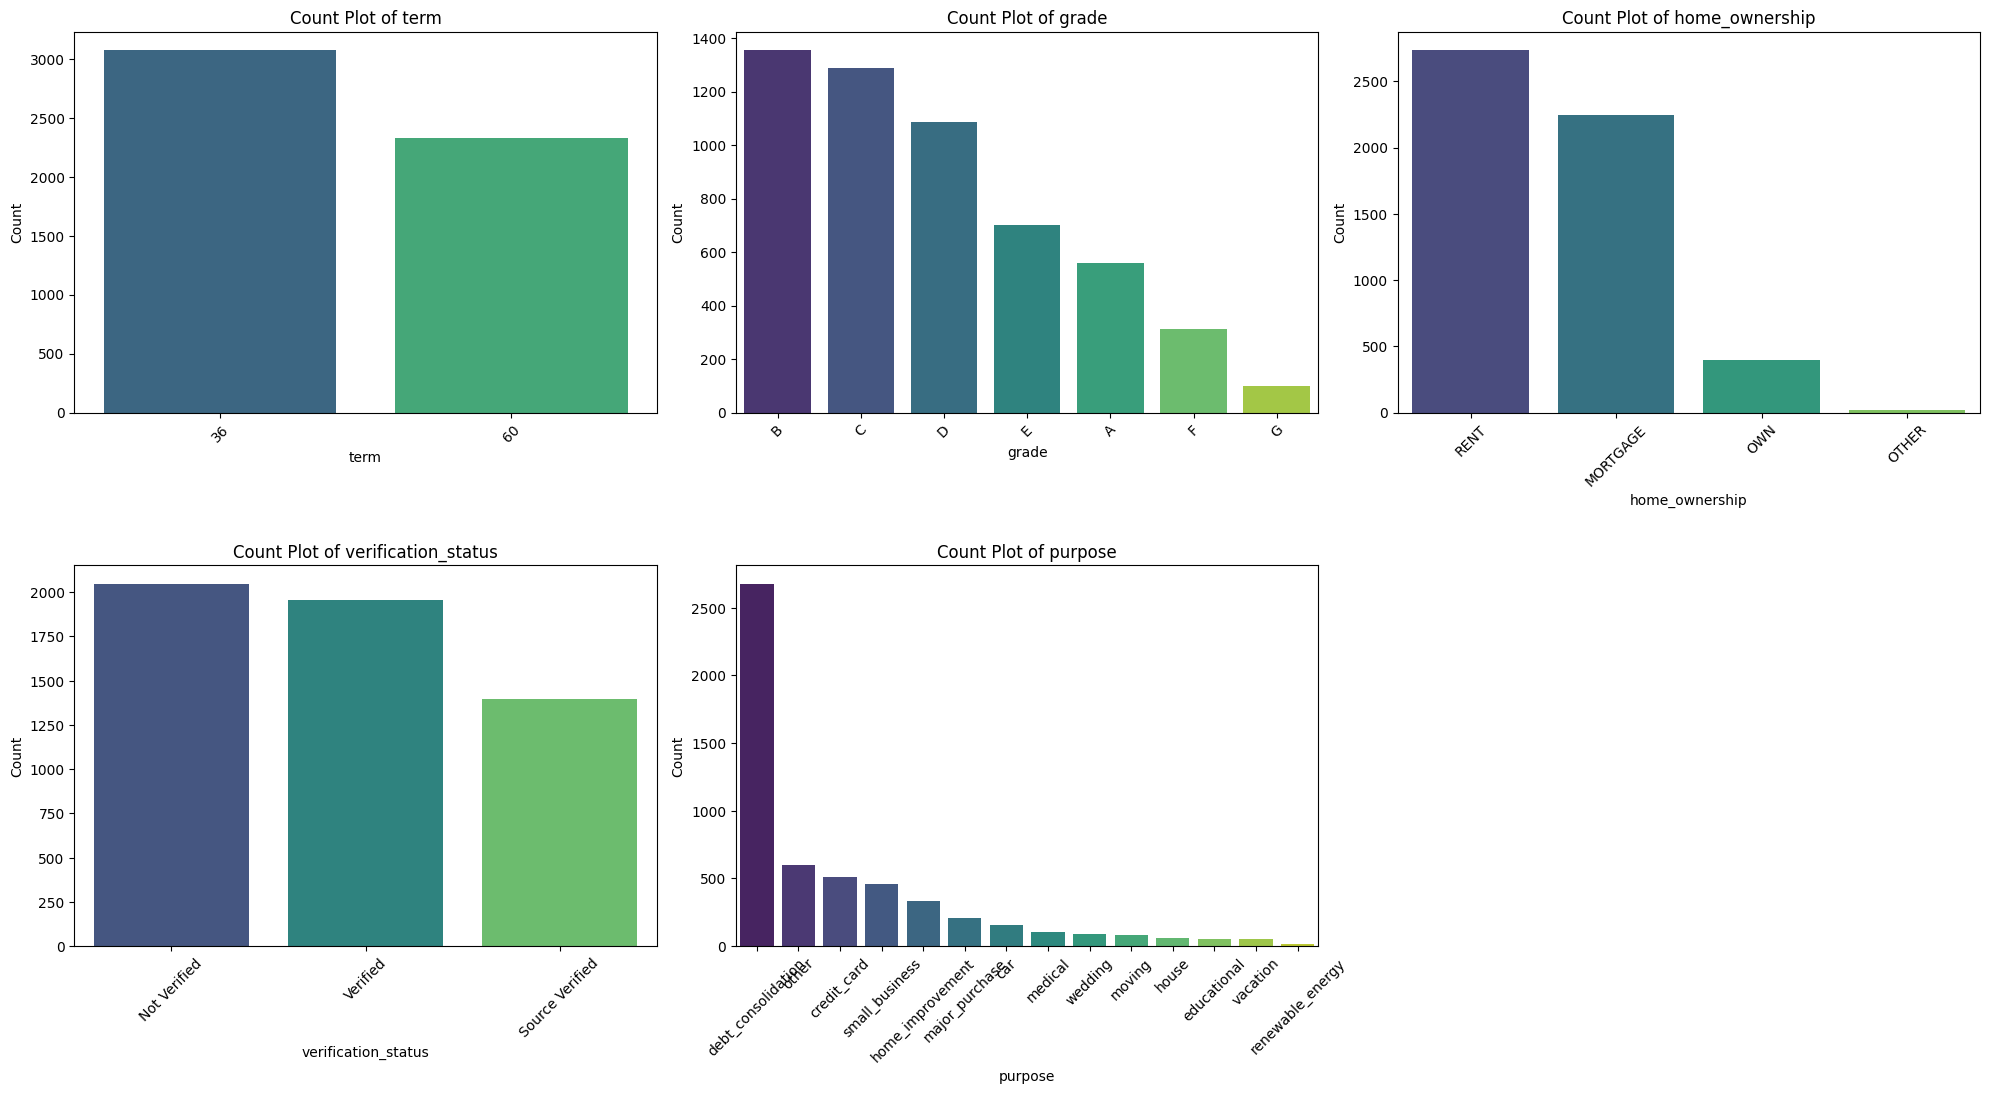

In [53]:
# List of categorical columns
categorical_cols = [
    'term', 'grade', 'home_ownership', 'verification_status','purpose'
]

# Creating grouped bar charts
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_charged_off, x=col, palette='viridis', order=df_charged_off[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


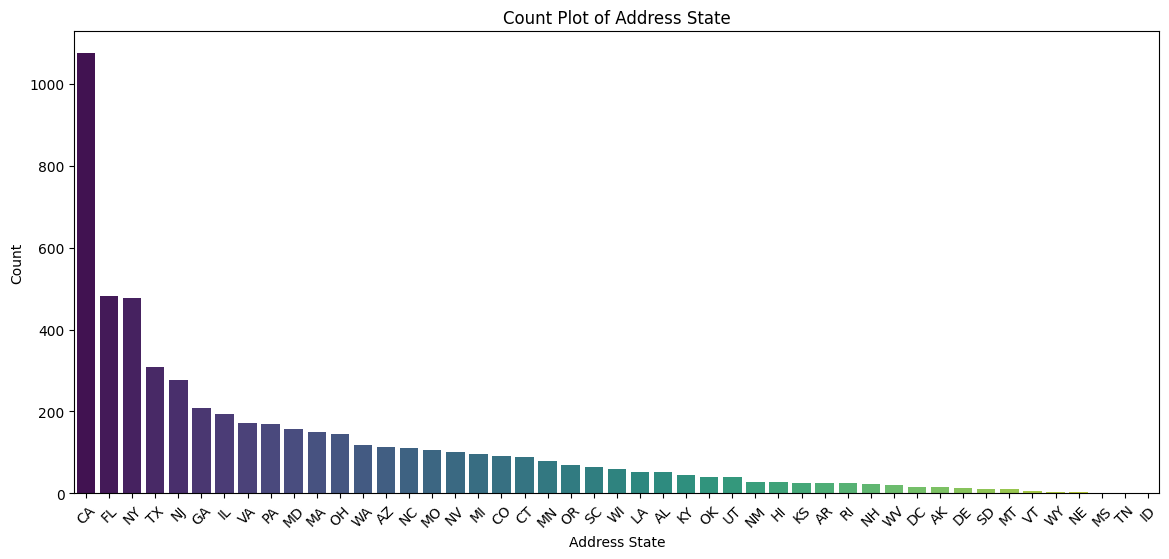

In [54]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_charged_off, x='addr_state', palette='viridis', order=df_charged_off['addr_state'].value_counts().index)
plt.title('Count Plot of Address State')
plt.xlabel('Address State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Analysis of Categorical Values for Charged off dataset
- Defaulters are more for shorter loan term which is 36 months
- Most charged off loans have grades in (B, C, and D)
- Borrowers who have their home status as renting or mortgage have defaulted more when compared to own house
- Debt Consolidation and Credit Card are two primary reasons for defaulting the loans
- States such as California (CA), Florida (FL), New York (NY) and Texas (TX) have higher defaulters as this could be related population size of these states
- The defaulters are trending down from Grade B - G
- Not Verified & Verified have defaulted more compared to Source Verified


In [55]:
# Summary statistics for numerical columns
print(df_latest[['loan_amnt', 'int_rate', 'annual_inc', 'installment']].describe())


         loan_amnt      int_rate     annual_inc   installment
count  37541.00000  37541.000000   37541.000000  37541.000000
mean   11011.23505     11.963580   65660.291665    321.133883
std     7040.61601      3.683037   32713.724078    198.306987
min      500.00000      5.420000    4000.000000     15.690000
25%     5500.00000      8.940000   41000.000000    167.380000
50%    10000.00000     11.830000   60000.000000    280.000000
75%    15000.00000     14.420000   83000.000000    429.040000
max    29250.00000     24.400000  146000.000000    821.530000


### Bivariate Analysis

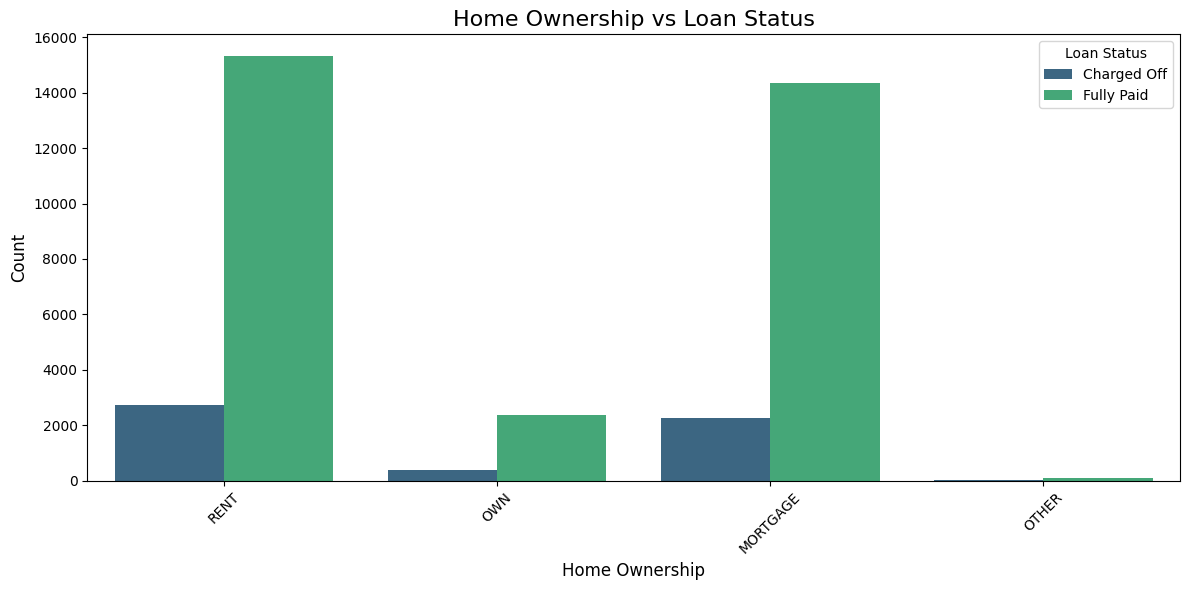

In [56]:
plt.figure(figsize=(12, 6))

# Create a count plot with hue as loan_status
sns.countplot(data=df_latest, x='home_ownership',hue='loan_status',palette='viridis')

# Set titles and labels
plt.title('Home Ownership vs Loan Status', fontsize=16)
plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status', labels=['Charged Off', 'Fully Paid'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Analysis for Home Ownership vs Loan Status
- Most loans are given to borrowers who are either mortgaged or renters.
- Defaulters are mostly who in category of Rent and Mortgaged house.

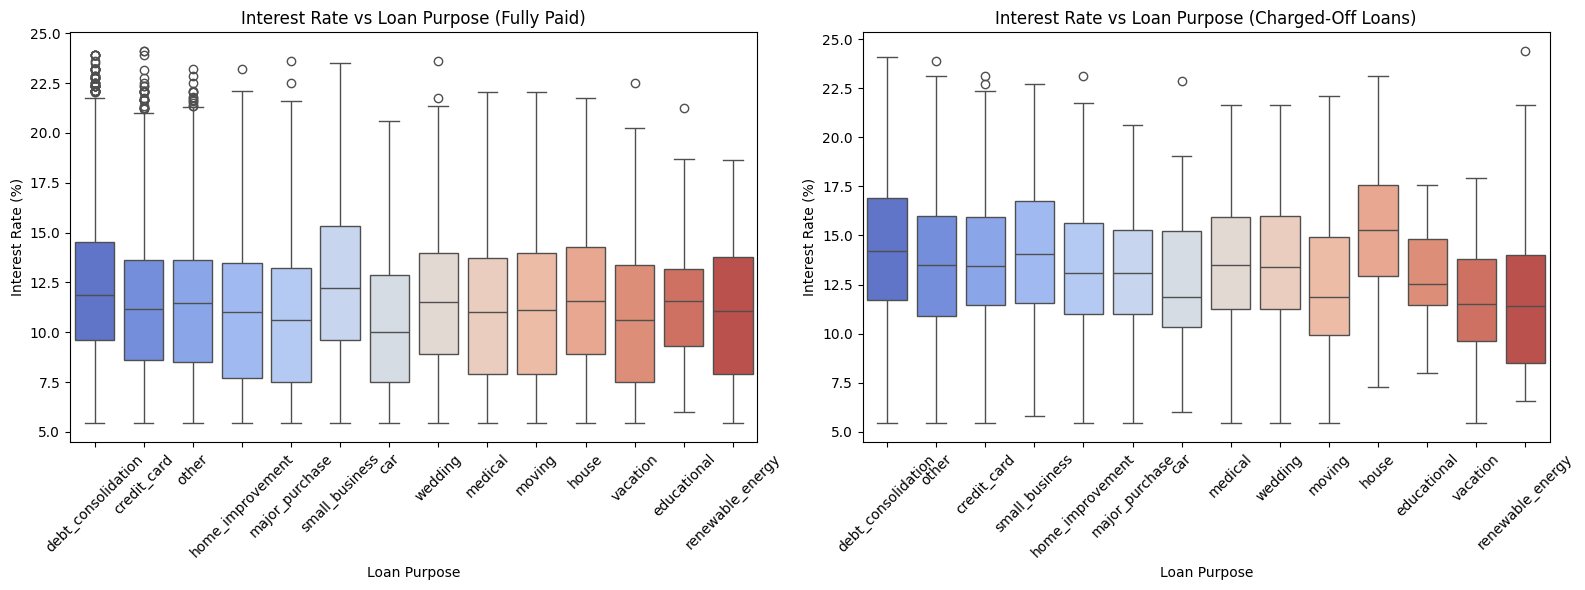

In [57]:
plt.figure(figsize=(16, 6))

# All Loans
plt.subplot(1, 2, 1)
sns.boxplot(data=df_fully_paid, x='purpose', y='int_rate', palette='coolwarm', order=df_latest['purpose'].value_counts().index)
plt.title('Interest Rate vs Loan Purpose (Fully Paid)')
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=45)

# Charged-Off Loans
plt.subplot(1, 2, 2)
sns.boxplot(data=df_charged_off, x='purpose', y='int_rate', palette='coolwarm', order=df_charged_off['purpose'].value_counts().index)
plt.title('Interest Rate vs Loan Purpose (Charged-Off Loans)')
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Analysis for Interest Rate vs Loan Purpose for both Fully Paid and Charged Off Datasets
- In General, Charged off loans have higher interest rates which might be one of the reason for defaulting
- House Category loans have much higher interest rate ~17.5% which could be another reason for defaulting
- Small Business loans have relatively higher interest rates which is between 15% - 17%
- Debt Consolidation and Credit Card are major reasons for loan.

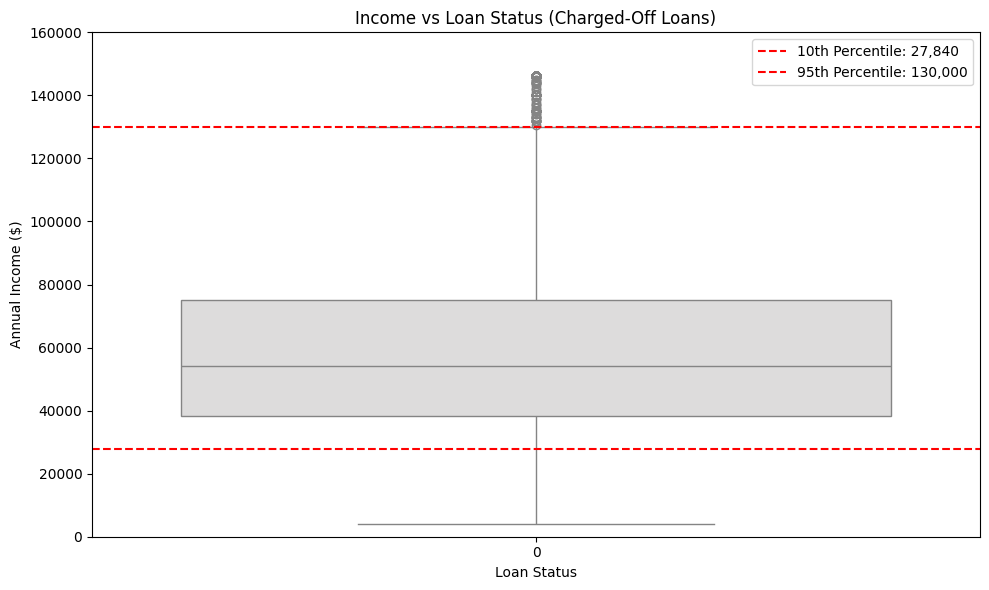

In [65]:
# Calculate specific percentiles
percentiles_draw = [10, 95]
percentile_values = np.percentile(df_charged_off['annual_inc'].dropna(), percentiles_draw)

# Create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_charged_off, x='loan_status', y='annual_inc', palette='coolwarm')

# Overlay percentiles on the plot
for p, value in zip(percentiles_draw, percentile_values):
    ax.axhline(value, color='red', linestyle='--', label=f'{p}th Percentile: {value:,.0f}')

# Add labels and title
plt.title('Income vs Loan Status (Charged-Off Loans)')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income ($)')
plt.ylim(0, 160000)
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()



- Income range between 40,000 to 75,000 have defaulted more
- Borrowers with higher incomes seem more likely to default their loans.
- Higher income people also have defaulted more when compared to fully paid. There are lot of outliers w.r.t Income range (ex: 130k - 150k)

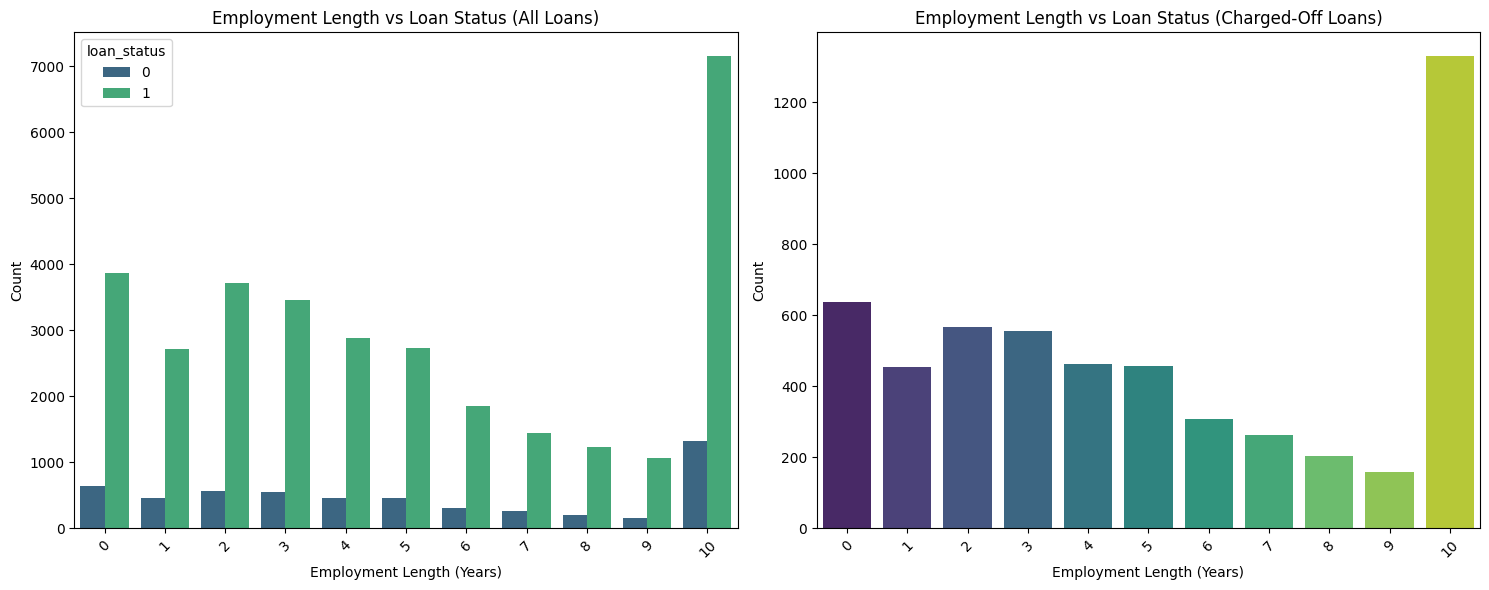

In [64]:
# Countplot for Employment Length vs Loan Status (All Loans)
plt.figure(figsize=(15, 6))

# Countplot for All Loans
plt.subplot(1, 2, 1)
sns.countplot(data=df_latest, x='emp_length', hue='loan_status', palette='viridis')
plt.title("Employment Length vs Loan Status (All Loans)")
plt.xlabel("Employment Length (Years)")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Countplot for Charged Off Loans
plt.subplot(1, 2, 2)
sns.countplot(data=df_charged_off, x='emp_length', palette='viridis')
plt.title("Employment Length vs Loan Status (Charged-Off Loans)")
plt.xlabel("Employment Length (Years)")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Analysis for Employment Length vs Loan Status
- Most of the defaulters have tenure between 0-1 or greater than 10 years
- Majority of Fully paid loans have higher employment tenure which is +10 years

### Multivariate Analysis

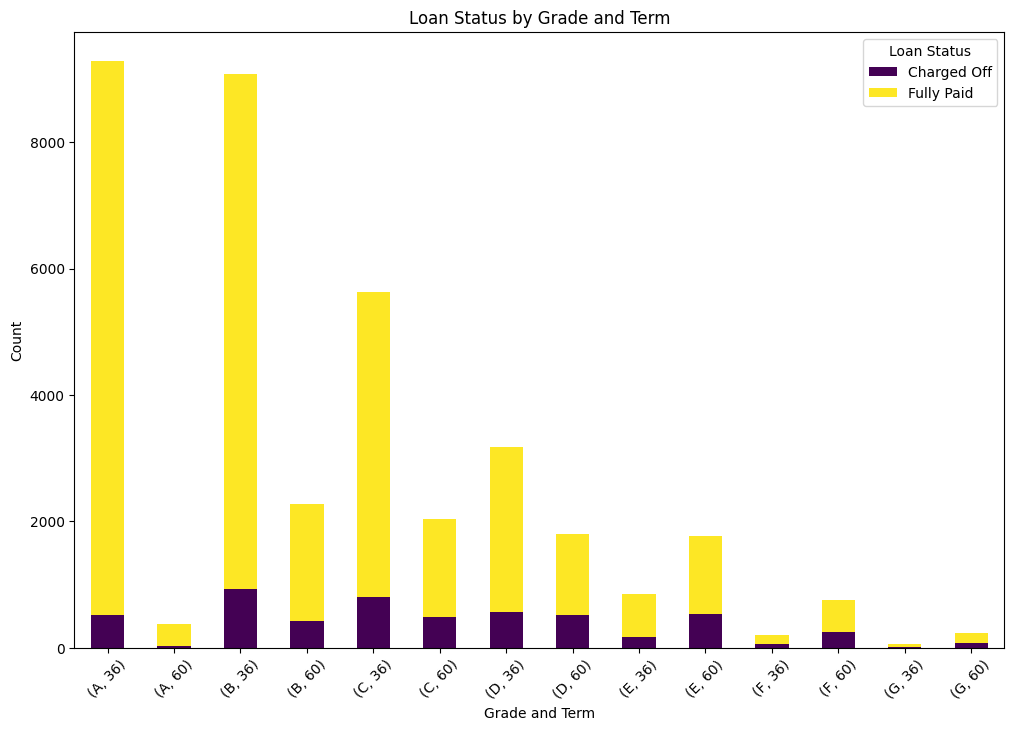

In [63]:
### Visualize relationships among multiple categorical variables, like grade, term, and loan_status

# Grouped bar chart for grade, term, and loan status
grouped_data_grade_term = pd.crosstab([df_latest['grade'], df_latest['term']], df_latest['loan_status'])
grouped_data_grade_term.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Loan Status by Grade and Term')
plt.xlabel('Grade and Term')
plt.ylabel('Count')
plt.legend(['Charged Off', 'Fully Paid'], title='Loan Status')
plt.xticks(rotation=45)
plt.show()


In [61]:
percentage_defaulters = (df_charged_off['loan_status'].count()/df_latest['loan_status'].count())*100
print(percentage_defaulters.__round__(2))

14.38


- Loan Grades A and B (36-Month Term) have the highest number of loans, with a majority being fully paid.
- Charged-off loans are significantly lower in comparison.  ~ 14% of people have defaulted out of complete dataset
- B, C grades with 36 months tenure have defaulted more when compared to other grades
- Higher Grades (D, E, F, G) have increasing proportion of charged-off loans relative to fully paid loans.
- 60-month term loans show a higher proportion of charged-off loans compared to 36-month term loans. This also indicate longer loan durations have bigger risk.

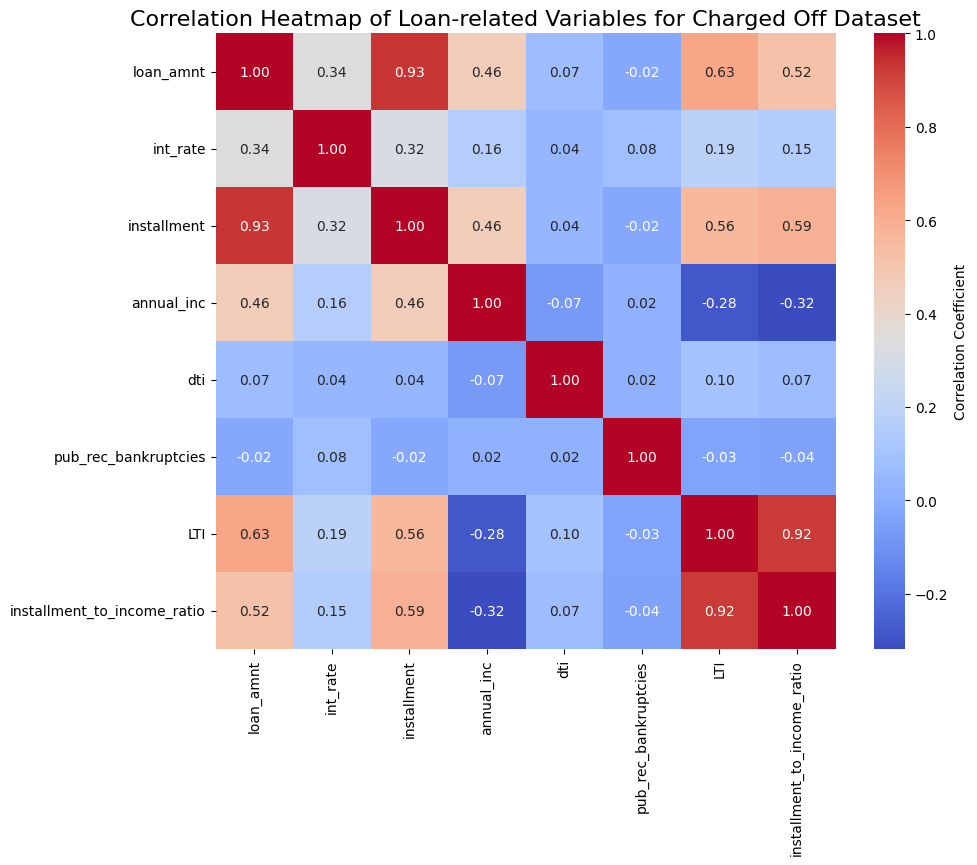

In [62]:
loan_related_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'LTI', 'installment_to_income_ratio']

df_loan_subset = df_charged_off[loan_related_vars]
correlation_matrix = df_loan_subset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap of Loan-related Variables for Charged Off Dataset', fontsize=16)
plt.show()




Analysis of different Variable

- The somewhat positive connection (0.63) suggests defaulters had larger debt amounts than income. This may indicate overborrowing risk.
- The moderate connection (0.46) between annual income and loan size shows that high-income borrowers may have defaulted on significant debts.
- Income alone isn't a good predictor of repayment behavior; higher income defaulters had better LTI ratios but defaulted, according to a negative correlation with LTI (-0.28).
- The small positive correlation (0.34) between interest rate and loan size suggests that defaulters with larger debts did not always get considerably higher interest rates.
- The data suggests that DTI is not a significant predictor of default behavior due to the poor correlations across variables (interest rate: 0.04; loan amount: 0.07).
- A small correlation with installment (0.59) indicated that defaulters frequently had high installments relative to their income.
- A negative correlation with annual income (-0.32) suggests that lower-income borrowers were more likely to take on disproportionately high installment burdens, which may have contributed to defaults.
- For defaulters, bankruptcies did not significantly differentiate them.



### Summary of the Study
The analysis gives us important information about the trends and causes of loan defaults:
#### Amount of the loan and changes in interest rates:
- The majority of loan amounts are between $5,000 and $15,000. There is also a noticeable cluster between $10,000 and $20,000, which is likely due to popular borrowing or lending patterns.
- The interest rates on charged-off loans are slightly higher (10% to 17%) than those on fully paid loans (10% to 15%), with some loans having rates higher than 22%, which could mean they are riskier.
#### Home Ownership and Default Behavior:
- People who rent or mortgage their homes are more likely to not pay back their loans than people who own their own houses.
- A lot more people don't pay back loans that were taken out to consolidate debt or pay off credit cards.
#### Location and patterns of employment:
- The failure rates are higher in states like California, Florida, New York, and Texas, which may be because they have more people.
- Most people who don't pay their loans either have been employed for a short time (0–1 years) or a long time (10 years or more). Borrowers who have been employed for 10 years or more usually pay their loans in full.
- Types of Loans and Terms: Loans with terms of 36 months and Grades B and C have the highest default rates. Loans with terms of 60 months or more have a higher risk of failure.
- Higher Grades (D, E, F, and G) have higher percentages of failures compared to fully paid loans.
- Borrowers with annual incomes between $40,000 and $75,000 are the most likely to not pay back their loans.
- Even people with higher incomes sometimes don't pay back bigger loans, showing that income alone isn't a good way to predict how people will return their debts.
#### Important numbers:
- A lot of loans compared to income and a lot of payments compared to income Ratios are popular among people who don't pay their debts, which shows that too much borrowing or big monthly payments are major risk factors.
- People with lower incomes often have to pay a lot of money for their monthly payments, which can lead to failures.
#### Few thoughts:
- The interest rates on debt consolidation and small business loans are higher (15–17%), which makes the risk of failure even higher.
- Bankruptcies don't make a difference between defaulters, which suggests that things like income & spending habits are important.
#### Important Points:
- High interest rates, large loan amounts compared to income, and heavy monthly payments are all strong indicators of defaulters.
- Policies that focus on stable income, reasonable payment loads, and stricter risk ratings for bigger loans could help lower the number of defaults.
- Loans for things like debt consolidation, small businesses, and credit card payments should be closely looked.
